# 설정

In [1]:
# 파이썬 ≥ 3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥ 0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 회귀

회귀는 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계적 기법으로, 현대 통계학을 떠받치고 있는 주요 기둥 중 하나다. 어떤 입력 데이터가 들어오면 연속적인 숫자(실수)를 예측하는 것이다. 이 모델을 훈련시키는 두 가지 방법을 설명하겠다.

<ul>
    <li>직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터)를 해석적으로 구한다.</li>
    <li>경사 하강법<sup>Gradient Descent</sup>이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다. 결국에는 앞의 방법과 동일한 파라미터로 수렴한다. 경사 하강법의 변종으로 배치<sup>batch</sup>경사 하강법, 미니배치<sup>mini-batch</sup> 경사 하강법, 확률적 경사 하강법<sup>Stochastic Gradient Descent</sup>도 살펴보겠다.</li>
</ul>

회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다. 예를 들어 아파타의 방 개수, 방 크기, 주변 학군 등 여러 개의 독립변수에 따라 아파트 가격이라는 종속변수가 어떤 관계를 나타내는지를 모델링하고 예측하는 것이다. $\mathrm{Y} = \mathrm{W_1X_1}+ \mathrm{W_2X_2} + \cdots + \mathrm{W_nX_n}$이라는 선형 회귀식을 예로 들면 $Y$는 종속변수, 즉 아파트 가격을 뜻하고 $\mathrm{X_1, X_2,}\cdots\mathrm{,X_n}$은 방 개수, 방 크기, 주변 학군 등의 독립변수를 의미한다. 그리고 $\mathrm{W_1, W_2,}\cdots\mathrm{,W_n}$은 이 독립변수의 값에 영향을 미치는 회귀 계수<sup>Regression coefficients</sup>다. 머신러닝 관점에서 보면 독립변수는 피처에 해당하며 종속변수는 결정 값이다. <mark>머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 <b>최적의 회귀 계수</b>를 찾아내는 것이다.</mark>

회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있다. 회귀에서 가장 중요한 것은 바로 회귀 계수다. 이 회귀 계수가 선형이냐 아니냐에 따라 선형 회귀와 비선형 회귀로 나눌 수 있다. 그리고 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉜다.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-1wig">독립변수 개수</th>
    <th class="tg-1wig">회귀 계수의 결합</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">1개: 단일 회귀</td>
    <td class="tg-0lax">선형: 선형 회귀</td>
  </tr>
  <tr>
    <td class="tg-0lax">여러 개: 다중 회귀</td>
    <td class="tg-0lax">비선형: 비선형 회귀</td>
  </tr>
</tbody>
</table>

여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용된다. 선형 회귀는 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식이다. 선형 회귀 모델은 규제<sup>Regularization</sup> 방법에 따라 다시 별도의 유형으로 나뉠 수 있다. 규제는 일반적인 선형 회귀의 과대적합 문데를 해결하기 위해서 회귀 계수에 페널티 값을 적용하는 것을 말한다. 대표적인 선형 회귀 모델은 다음과 같다.

<ul>
    <li><b>일반 선형 회귀:</b> 예측값과 실제 값의 RSS<sup>Residual Sum of Squares</sup>를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제<sup>Regularization</sup>를 적용하지 않은 모델이다.</li>
    <li><b>릿지<sup>Ridge</sup>:</b> 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델이다. 릿지 회귀는 L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델이다.</li>
    <li><b>라쏘<sup>Lasso</sup>:</b> 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식이다. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. 이러한 특성 때문에 L1 규제는 피처 선택 기능으로도 불린다.</li>
    <li><b>엘라스틱넷<sup>ElasticNet</sup>:</b>L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정한다.</li>
    <li><b>로지스틱 회귀<sup>Logistic Regression</sup>:</b> 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델이다. 로지스틱 회귀는 매우 강력한 분류 알고리즘이다. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보인다.</li>
</ul>

## 단순 선형 회귀

단순 선형 회귀는 독립변수도 하나, 종속변수도 하나인 선형 회귀다. 예를 들어, 주택 가격이 주택의 크기로만 결정된다고 하자. 일반적으로 주택의 크기가 크면 가격이 높아지는 경향이 있기 때문에 다음과 같이 주택 가격과 주택 크기에 대한 선형(직선 형태)의 관계로 표현할 수 있다.

<b>그림 1</b> 단순 선형 회귀
<div style="text-align:center;">
    <img src="./images/Regression/reg.png">
</div>

$\mathrm{X}$축이 주택의 크기 축(평당 크기)이고 $\mathrm{Y}$축이 주택의 가격 축인 2차원 평면에서 주택 가격은 특정 기울기와 절편을 가진 1차 함수식으로 모델링할 수 있다. 해당 문제의 선형 모델 공식은 다음과 같다.

$$
\hat{y} = w_0 + w_1\mathrm{X}
$$

독립변수가 1개인 단순 선형 회귀에서는 이 기울기 $w1$과 절편 $w_0$을 회귀 계수로 지칭한다(절편은 intercept이다). 독립변수와 종속변수 사이의 관계를 나타내는 선형 방정식의 가중치를 학습하는 것이 목적이다. 이 방정식으로 훈련 데이터셋이 아닌 새로운 샘플의 타깃 값을 예측할 수 있다. 그리고 회귀 모델을 위와 같은 1차 함수로 모델링했다면 실제 주택 가격은 이러한 1차 함수 값에서 실제 값만큼의 오류 값을 뺀(또는 더한) 값이 된다($w_0 + w_1\mathrm{X}$ + 오류 값).

이렇게 실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부른다. <mark>최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값, offset이라고도 한다) 합이 최소가 되는 모델을 만든다는 의미다. 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미도 된다.</mark>

<b>그림 2</b> 잔차
<div style="text-align:center;">
    <img src="./images/Regression/reg2.png">
</div>

오류 값은 +나 -가 될 수 있다. 그래서 전체 데이터의 오류 합을 구하기 위해 단순히 더했다가는 뜻하지 않게 오류 합이 크게 줄어들 수 있다. 따라서 보통 오류 합을 계산할 때는 절댓값을 취해서 더하는 MAE<sup>Mean Absolute Error</sup>, 오류 값의 제곱을 구해서 더하는 방식인 RSS<sup>Residual Sum of Square</sup>을 취한다. 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS 방식으로 오류 합을 구한다. 즉, Error<sup>2</sup> = RSS이다.

<b>그림 3</b> RSS
<div style="text-align:center;">
    <img src="./images/Regression/reg3.png">
</div>

RSS는 이제 변수가 $w_0, w_1$인 식으로 표현할 수 있으며, 이 RSS를 최소로 하는 $w_0, w_1$, 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항이다. RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요하다(학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주한다). 일반적으로 RSS는 학습 데이터의 건수로 나누어서 다음과 같이 정규화된 식으로 표현된다.

$$
\text{RSS}(w_0, w_1) = \frac{1}{N}\sum_{i=1}^N(y_i - (w_0 + w_1x_1))^2
$$

회귀에서 이 RSS는 비용<sup>cost</sup>이며 w 변수(회귀 계수)로 구성되는 RSS를 비용함수라고 한다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이다. 비용 함수를 손실 함수<sup>loss function</sup>라고도 한다.

### 단순 선형 회귀 모델의 통계적 평가

$\varepsilon$(오차)는 확률 변수로 두는 경우가 많다. 이 전제를 세울 때 단순 선형 회귀 모델은 확률 시스템이 되고 모델의 좋고 나쁨은 통계적 평가를 거치게 된다. 특히, $\varepsilon$이 정규분포를 따른다고 가정할 때의 평가지표는 이론적으로 입증되어 있다.

#### 회귀계수의 t검정

단순 선형 회귀 모델이 확률시스템이라는 가정 아래, 회귀계수는 확률 변수가 되고 표본마다 그 값이 변한다. 특히 계수 $w_0, w_1$의 값이 0인가의 여부를 문제로 하고 싶은 경우가 있다. 이를 위해 다음의 가설검정을 실시한다.

$$
H_0: \text{계수는 0이다.}\\
H_1: \text{계수는 0이 아니다.}
$$

여기에서 계수는 $w_0$, 또는 $w_1$ 모두를 나타내고, 각각 별도로 검정을 실시한다. 각 계수에 관한 검정은 $\varepsilon_i$의 분산을 이용하는 것이 되지만, 이 분산은 알지 못한다. 이 때문에 표본분산을 이용한 t 검정을 실시하게 된다. 각 계수에 대한 t검정통계량과 이것에 수반되는 값은 statsmodels이 계산하기 때문에 이 값을 보고 $H_0$를 기각할지의 여부를 판단할 수 있다.

#### 결정계수

<b>결정계수</b><sup>coefficient of determination</sup>는 $R^2$로 표현하고, 회귀 모델의 데이터에 대해서 적합한 정도를 나타내는 지표로 statsmodels가 계산한다. 결정 계수는 다음의 범위를 취한다.

$$
0 < R^2 \leq 1
$$

이 식이 1에 가까울수록 잘 적합되었다고 판단하고 독립변수가 종속변수를 잘 설명하고 있다고 말한다. 일반적으로 자주 언급되지만 $R^2$가 0.6이하라면 좋지 않지만 0.8 이상이라면 어느 정도 좋은 모델이라고 판단된다. 하지만 이 값은 절대적 평가가 아니므로 0.6 이하라면 절대로 안 되고 0.8 이상이라면 절대로 좋은 것이라고 말할 수 없다. 결정계수 $R^2$의 값은 절대적인 지표가 아니라 어디까지나 기준이라는 것을 인식하는 것이 좋다.

#### 가계 동향 조사

가계 동향 조사(통계청)의 Web 사이트에서 2인 이상 세대의 연간 수입에 대해, 1개월당 지출과 엥겔계수 각각에 대한 단순 회귀 분석을 실시한다. 가공한 데이터를 다음에 제시한 URL로 액세스하여 이 데이터를 읽어 들인다.

In [17]:
import statsmodels.formula.api as smf
import pandas as pd

url = 'https://sites.google.com/site/datasciencehiro/datasets/FamilyIncome.csv'
df = pd.read_csv(url, comment='#')
df.head()

,income,expenditure,engel
0,216,172462,30.8
1,304,204599,29.9
2,356,224776,28.8
3,413,240153,27.8
4,481,255497,27.3


데이터의 내용은 위와 같이 income(연간 수입 [10만 원]), expenditure(월간 지출), engel(엥겔계수)이 나열되었다. index의 값은 income의 순위 0(최저 수입) ~ 9(최고 수입)의 10등급을 의미한다.

이 데이터에서 독립 변수를 income, 종속 변수를 expenditure로 하는 단순회귀분석은 다음과 같이 기술한다

In [20]:
result = smf.ols('expenditure ~ income', data=df).fit()
w0, w1 = result.params
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     624.7
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           7.02e-09
Time:                        16:53:09   Log-Likelihood:                -105.43
No. Observations:                  10   AIC:                             214.9
Df Residuals:                       8   BIC:                             215.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.4e+05   6550.516     21.366      0.0

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


여기에서 변수 w0, w1에는 단순 선형 회귀 모델의 절편항과 기울기가 반환된다. 또한, <code>smf.ols()</code>는 최소제곱법을 이용한 계산을 수행하고 인수 파라미터의 제공 방식은 R 언어 스타일의 표기법을 따른다.

<ul>
    <li>OLS(최소 제곱법)를 이용한 회귀분석 결과이고 목적변수(Dep. Variable)는 expenditure이다.</li>
    <li>R-squared: 결정계수 $R^2$의 값은 0.987이다.</li>
    <li>Intercept: 절편항, coef(계수값)는 1.4 x 10<sup>5</sup>, t는 계수에 관한 검정통계량의 값, P > |t|는 t 검정에서 p값이 0.000임을 나타내고 있다. 유의수준을 5%(0.05)로 할것까지도 없이 이 계수가 0이라는 가설은 기각된다. 즉, 이 값은 유의하게 존재한다고 할 수 있다.</li>
    <li>income: 독립 변수 income의 계수에 대해서, 그 계수값, p값 등이 표시된다. 이것도 계수값이 0이 아님을 나타내고 있다. </li>
    <li>std err(계수값의 산포도를 나타내는 표준편차), [0.025, 0.975] (유의수준 5%로 할 때의 계수의 구간추정, 계수의 하한값과 상한값)</li>
</ul>

이 결과에 의해, 구해진 단순 선형 회귀 모델은 다음과 같다.

$$
\text{expenditure} = w0 + w1 \times \text{income}
$$

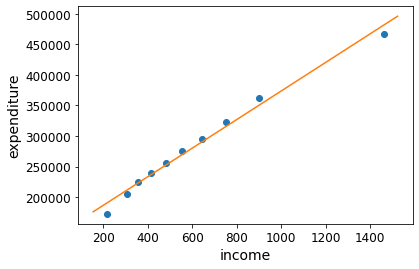

In [27]:
plt.plot(df['income'], df['expenditure'], 'o')
start, end = plt.xlim()
plt.plot(np.arange(start, end, 0.1), w0 + w1 * np.arange(start, end, 0.1))
plt.xlabel('income'); plt.ylabel('expenditure')
plt.show()

이 그래프를 보고, 구해진 단순 선형 회귀 모델이 좋은 지표가 된다고 판단한다면, 데이터에는 없는 연간 수입이 1억 1,000만 원, 1억 2,000만 원인 가정의 월 지출액을 예측할 수 있을 것이다.

In [31]:
NewData = {'income': [1100, 1200]}
Newdf = pd.DataFrame(NewData)
pred = result.predict(Newdf)
pred

0    397198.498402
1    420584.101981
dtype: float64

#### 심슨의 역설

회귀분석을 바로 수행하지 않고, 그 전의 데이터 가시화도 포함하여 몇 가지 통계량을 살펴보고 나서 회귀분석을 실시한 뒤에 사전분석과 대조하여 확인한 후 결과를 평가하는 것이 바람직하다.

이것을 게을리하여 잘못을 범하는 대표적인 예로 통계학에서 유명한 심슨의 역설<sup>Simpson's paradox</sup>이 있다. 이것은 모집단의 상관과 부분집단의 상관이 다른 경우가 있고 부분집단에서의 가설이나 통계분석 결과가 모집단과는 정반대의 결과가 나오는 것을 지적하고 있다.

#### 수학적 설명

엄밀한 수학에 의한 증명이나 도출을 수행하지 않고, 수식으로 표현된 항목이나 지표를 어떻게 생각하면 좋은가라는 <b>판단력을 기르는</b> 것에 초점을 맞추어 설명한다.

우선 다음과 같이 설정한다.

<b>취득 데이터:</b> $\left\{x_i, y_i\right\}\,(i=1, ..., N)$<br>
<b>실제 시스템:</b> $y_i = w_0 + w_1x_i + \varepsilon_i,\,\varepsilon_i \sim N(0, \sigma^2)$<br>
<b>회귀 모델:</b> $\hat{y}_i = \hat{w}_0 + \hat{w}_1x_i$<br>
<b>$x, y$의 표본평균:</b> $\hat{\mu}_x, \hat{\mu}_y$

##### 회귀계수의 성질

앞에 기술한 가정 하에 추정한 회귀계수의 성질은 다음과 같다.

<b>불편추정량:</b>

$$
E[\hat{w}_0] = w_0,\, E[\hat{w}_1] = w_1
$$

<b>일치추정량:</b> $N \to \infty$일 때 아래 계수의 분산은 0에 가까워진다.

$$
\sigma^2_{\hat{w}_0} = \mathrm{V}[\hat{w}_0] = (\frac{1}{N} + \frac{\hat{\mu}_x^2}{\sum_{i=1}^N(x_i - \hat{\mu}_x)})\sigma^2\,\,\,\,\text{(1)}
$$

$$
\sigma_{\hat{w}_1}^2 = \mathrm{V}[\hat{w}_1] = \frac{\sigma^2}{\sum_{i=1}^N(x_i - \hat{\mu}_x)}\,\,\,\,\text{(2)}
$$

<b>정규성:</b>

$$
\hat{w}_0 \sim N(w_0, \mathrm{V}[\hat{w}_0]),\,\,\,\hat{w}_1 \sim N(w_1, \mathrm{V}[\hat{w}_1])
$$

이러한 성질 중에서 불편추정량과 일치추정량은 유용하게 이용된다.

##### 회귀계수의 검정

추정한 회귀계수의 검정 개요를 기술한다. 우선 $\hat{w}_1$을 대상으로 고려한다. 이것은 어느 특정값 $w_1$과 동일한가의 여부에 대한 검정을 고려한다. 이 경우의 가설은 $H_0: \hat{w}_1 = w_1, H_1 = \hat{w}_1 \neq w_1$이다.

모분산 $\sigma^2$를 알지 못하므로 대신 다음의 $\sigma^2$을 이용한다.

$$
\varepsilon_i = y_i - \hat{y}_i = y_i - (\hat{w}_0 + \hat{w}_1x_i)
$$

$$
\hat{\sigma}^2 = \frac{1}{N - 2}\sum_{i=1}^N\varepsilon_i^2
$$

두 번째 식에서 N - 2로 나눈 이유는 회귀계수를 최소제곱법으로 구할 때 $\varepsilon_i$의 총합은 0, 또한 변수 벡터와 계수 벡터의 내적을 0으로 한다는 두 가지 제약이 가해져서 자유도가 2만큼 줄어들기 때문이다.

식 (2)의 $\sigma^2$대신 $\hat{\sigma}^2$을 이용하여 $\mathrm{V}[\hat{w}_1](\hat{\sigma}^2)$으로 나타낸다. 이것을 이용하여 $\hat{w}_1$의 검정통계량을 다음 식으로 나타낸다.

$$
t_{w_1} = \frac{\hat{w}_1 - w_1}{\sqrt{\mathrm{V}[\hat{w}_1](\hat{\sigma}^2)}}\sim t(N - 2)
$$

이 $t_{w_1}$은 통계의 검정에서 나타나는 것과 동일한 형식이기 때문에 검정과 동일한 검정절차 $w_0$를 수행하게 된다. 다만 자유도 N - 2인 t분포를 따르는 것에 주의하기 바란다.

$w_0$에 관해서도 동일한 검정을 수행할 수 있는 검정통계량이 도출된다. statsmodels의 회귀분석에서는 $w_0 = w_1 = 0$으로 두고 $w_0$ 및 $w_1$이 개별적으로 0이 되는가에 여부에 대한 검정을 수행하고 그 결과를 P > |t|로 나타낸다.

##### 결정계수 R<sup>2</sup>

결정계수는 다음 식으로 정의된다.

$$
R^2 = \frac{\sum_{i=1}^N(\hat{y}_i - \hat{\mu}_y)^2}{\sum_{i=1}^N(y_i - \hat{\mu}_y)^2} = 1 - \frac{\sum_{i=1}^N(y_i - \hat{y}_i)^2}{\sum_{i=1}^N(y_i - \hat{\mu}_y)^2}\,\,\,(0\leq R^2 \leq 1)
$$

가운데 식을 보면 분자가 모델 출력 $\hat{y}$의 분산, 분모가 시스템 출력 $y$의 분산이라고 볼 수 있고 분산비를 나타내고 있다. 이것을 통계에서는 변동비라고 부른다. 따라서 최적적합의 $R^2 = 1$이라는 것은 분산이 동일하다는 것을 기술하고 있다. 통계량인 분산이나 평균이 동일하더라도, 다른 데이터 계열을 나타내는 경우는 자주 있다. 따라서 이것만을 살펴보면 $R^2$가 잘 적합되었다는 것을 나타내는 지표가 될 수 없다.

그러나 오른쪽 식의 두 번째 항 분자를 보면 시스템과 모델 출력의 오차분산을 측정하고 이것은 일치성을 측정하는 지표이므로 이 관점으로부터 $R^2$가 잘 적합되었다는 것을 나타내는 지표가 된다는 것을 알 수 있다.

가운데 식이 도움이 안 되는가하면 그렇지도 않다. 세상에는 적합보다는 분산비(즉, 에너지비)를 중요시하는 분야도 있고 이러한 관점에서 보면 유용한 표현이다.

## 선형 회귀

앞서 독립 변수가 하나인 단순 선형 회귀로 선형 회귀의 개념을 잠깐 살펴보았다. 이제는 독립 변수를 여러 개로 확장시켜서 일반화해보자.

더 일반적으로 선형 모델은 입력 특성의 가중치 합과 <b>편향</b><sup>bias</sup>(또는 <b>절편</b><sup>intercept</sup>)이라는 상수를 더해 예측을 만든다.

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_mx_m
$$

<ul>
    <li>$\hat{y}$는 예측값이다.</li>
    <li>$m$은 특성의 수다.</li>
    <li>$x_i$는 $i$번째 특성값이다.</li>
    <li>$\theta_j$는 $j$번째 모델 파라미터다(편향 $\theta_0$과 특성의 가중치 $\theta_1, \theta_2, \cdots, \theta_m$을 포함한다).</li>
</ul>

이 식은 다음 식처럼 벡터 형태로 더 간단하게 쓸 수 있다.

$$
\hat{y} = h_{\theta}(\mathrm{x}) = \mathrm{\theta\cdot x}
$$

<ul>
    <li>$\mathrm{\theta}$는 편향 $\theta_0$과 $\theta_1$에서 $\theta_m$까지의 특성 가중치를 담은 모델의 파라미터 벡터다.</li>
    <li>$\mathrm{x}$는 $x_0$에서 $x_m$까지 담은 샘플의 <b>특성 벡터</b>다. $x_0$는 항상 1이다.<sup><a id="a01" href="#p01">[1]</a></sup></li>
    <li>$\mathrm{\theta\cdot x}$는 벡터 $\theta$와 $\mathrm{x}$의 점곱이다. 이는 $\theta_0x_0+\theta_1x_1+\cdots+\theta_mx_m$와 같다.</li>
    <li>$h_{\theta}$는 모델 파라미터 $\theta$를 사용한 가설<sup>hypothesis</sup>함수다.</li>
</ul>

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: green"><strong>NOTE_</strong></span>머신러닝에서는 종종 벡터를 하나의 열을 가진 2D 배열인 <b>열 벡터</b><sup>column vector</sup>로 나타낸다. $\theta$와 $\mathrm{x}$가 열 벡터라면 예측은 $\hat{y} = \theta^T\mathrm{x}$이다. 여기에서 $\theta^T$는 $\theta$의 전치<sup>Transpose</sup>이다(열 벡터가 아니라 행 벡터가 된다). $\theta^T\mathrm{x}$는 $\theta^T$와 $\mathrm{x}$의 행렬 곱셈이다. 물론 예측 결과는 같지만 스칼라 값이 아니라 하나의 원소를 가진 행렬이 만들어진다.
</div>

이것이 선형 회귀 모델이다. 이제 선형 회귀 모델을 훈련시켜보자. 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다. 회귀에 가장 널리 사용되는 성능 측정 지표는 평균 제곱근 오차<sup>RMSEM</sup>이다. 그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 $\theta$를 찾아야 한다. 실제로는 RMSE보다 평균 제곱 오차<sup>mean square error</sup>(MSE)를 최소화하는 것이 같은 결과를 내면서(어떤 함수를 최소화하는 것은 그 함수의 제곱근을 최소화하는 것과 같으므로) 더 간단하다.<sup><a id="a02" href="#p02">[2]</a></sup>

훈련 세트 $\mathrm{X}$에 대한 선형 회귀 가설 $h_{\theta}$의 MSE는 다음 식처럼 계산한다.

$$
\text{MSE}(\mathrm{X}, h_{\theta}) = \frac{1}{n}\sum_{i=1}^n(y^{(i)} - \theta^T\mathrm{x}^{(i)})^2
$$

## 회귀 모델의 확률적 해석

앞서 말했듯, 회귀 문제는 여러 독립 변수와 종속 변수의 관계를 연속 함수 형태로 분석하는 문제이다. 관측 항목을 독립 변수화 종속 변수로 나누고 이들의 관계를 함수 형태로 분석한다. 데이터를 관측할 때 발생하는 관측 오차 또는 실험 오차는 <b>가우시안 분포</b><sup>Gaussian distribution</sup>로 정의되므로, 회귀 문제는 가우시안 분포를 예측하는 모델로 정의할 수 있다.

관측 데이터를 수집할 때마다 값이 조금씩 달라지는데 이런 변동분을 관측 오차<sup>observational error</sup>라고 한다. 관측 오차를 노이즈<sup>noise</sup>라고도 한다.

### 가우시안 분포

가우시안 분포는 평균을 중심으로 대칭적인 종 모양의 사건이 발생할 확률을 나타내며 다음과 같은 식으로 정의한다.

$$
N(x|\mu,\,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

$x$는 확률 변수, $\mu$는 평균, $\sigma^2$는 분산, $\sigma$는 표준편차다. 가우시안 분포는 관측 데이터의 분포를 근사하는 데에 자주 쓰인다. 중심 극한 정리<sup>central limit therem</sup>에 따라 독립적인 확률 변수들의 평균은 가우시안 분포에 가까워지는 성질이 있기 때문이다.

<b>그림 4</b> 가우시안 분포
<div style="text-align:center;">
    <img src="./images/Regression/GD.jpg">
</div>

### 회귀 모델 정의

회귀 문제를 확률 모델로 정의해 보자. 관측 데이터는 $D = \left\{(x_i, t_i): i=1, ..., N\right\}$로 N개의 $(x_i, t_i)$ 샘플로 구성된다. 입력 데이터 $x_i$는 같은 분포에서 독립적으로 샘플링되어 i.i.d를 만족한다고 하자. 타깃 $t_i$는 모델 예측값 $y(x_i; \theta)$에 관측 오차 $\varepsilon$가 더해진 값으로 정의되며 관측 오차 $\varepsilon$는 가우시안 분포 $N(\varepsilon|0,\,\beta^{-1})$를 따른다고 가정한다. 이때 오차의 분산 $\beta^{-1}$는 정밀도<sup>precision</sup> $\beta$의 역수로 상수로 가정한다.

분산과 정밀도는 서로 역수 관계다. 즉, 분산이 크면 정밀하지 않은 것으로 생각하고, 분산이 작으면 정밀한 것으로 생각할 수 있다.

여기서는 설명을 간단히 하기 위해서 회귀 문제의 타깃이 실수라고 가정하고 설명하고 있지만 일반적으로 타깃은 다차원 공간의 연속 함수에 있는 한 점이다. 이는 실수 벡터로 표현하며 타깃의 분포는 다변량 가우시안 분포가 된다.

$$
t_i = y(x_i;\,\theta) + \varepsilon,\,\varepsilon \sim N(\varepsilon|0, \beta^{-1})
$$

다음 그림에서 회색 점은 관측 데이터의 타깃 $t_i$이다. 입력 $x_i$마다 관측 데이터인 타깃 $t_i$의 가우시안 분포가 달라진다. 예를 들어 $x_i$를 집값을 예측하기 위한 입력인 '방이 3개, 32평, 아파트, 역과의 거리가 20분 거리'라고 하면 회색 점들은 집값 관측 데이터인 $t_i$이다. 따라서 동일한 입력 $x_i$마다 여러 회색 점들이 존재하므로 집값의 분포를 이루게 된다.

<b>그림 5</b> 회귀 문제에서 확률 모델의 가우시안 분포 예측
<div style="text-align:center;">
    <img src="./images/Regression/회귀모델의 가우시안분포.jpg">
</div>

따라서 회귀 모델은 입력 $x_i$가 주어졌을 때 타깃 $t_i$의 조건부 확률분포인 $p(t_i|x_i;\,\theta)$를 예측한다. 관측 오차 $\varepsilon$은 가우시안 분포 $N(\varepsilon|0,\,\beta^{-1})$로 가정했기 때문에 타깃 $t_i$의 분포는 관측 오차의 분산 $\beta^{-1}$를 갖는 가우시안 분포 $N(t_i|y(x_i;\,\theta), \beta^{-1})$로 정의된다. 따라서 신경망 모델은 평균 $y(x_i;\,\theta)$만 예측하면 된다.

## 정규방정식

비용 함수를 최소화하는 $\theta$값을 찾기 위한 <b>해석적인 방법</b>이 있다. 다른 말로 하면 바로 결과를 얻을 수 있는 수학 공식이 있다. 이를 <b>정규방정식</b><sup>normal equation</sup>이라고 한다.

$$
\hat{\theta} = (\mathrm{X^TX})^{-1}\mathrm{X^Ty}
$$

<ul>
    <li>$\hat{\theta}$는 비용 함수를 최소화하는 $\theta$값이다.</li>
    <li>$\mathrm{y}$는 $y_1$부터 $y_n$까지 포함하는 타깃 벡터다.</li>
</ul>

이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 생성하겠다.

그림 저장: generated_data_plot


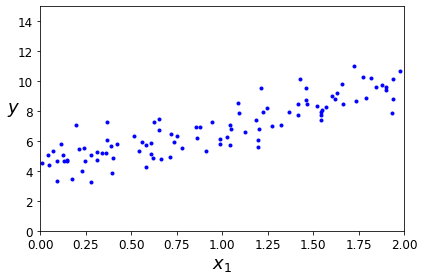

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

그럼 이제 정규방정식을 사용해 $\hat{\theta}$을 계산해보겠다. 넘파이 선형대수 모듈(np.linalg)에 있는 <code>inv()</code> 함수를 사용해 역행렬을 계산하고 <code>dot()</code> 메서드를 사용해 행렬 곱셈을 하겠다.

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

이 데이터를 생성하기 위해 사용하는 함수는 $y = 4 + 3x_1 + \text{가우시안_잡음}$이다. 정규방정식으로 계산한 값을 확인해보겠다.

In [4]:
theta_best

array([[4.21509616],
       [2.77011339]])

$\theta_0=4.215$와 $\theta_1=2.770$ 대신 $\theta_0=4$와 $\theta_1=3$을 기대했었다. 매우 비슷하지만 잡음 때문에 원래 함수의 파라미터를 정확하게 재현하지 못했다.

$\hat{\theta}$을 사용해 예측을 해보겠다.

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

모델의 예측을 그래프에 나타내보겠다.

그림 저장: linear_model_predictions_plot


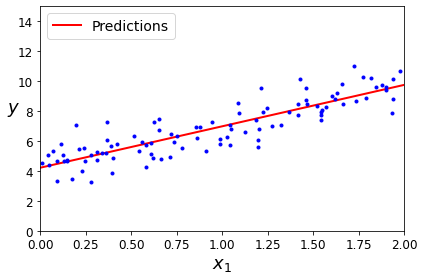

In [6]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

사이킷런에서 선형 회귀를 수행하는 것은 간단하다.<sup><a id="a03" href="p03">[3]</a></sup>

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

LinearRegression 클래스는 <code>scipy.linalg.lstsq()</code> 함수('최소 제곱<sup>least squares</sup>'에서 이름을 따왔다)를 기반으로 한다. 이 함수를 직접 호출할 수 있다.

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\hat{\theta} = \mathrm{X^+y}$을 계산한다. 여기에서 $\mathrm{X^+}$는 $\mathrm{X}$의 <b>유사역행렬</b><sup>pseudoinverse</sup>이다(정확하게는 무어-펜로즈<sup>Moore-Penrose</sup> 역행렬이다). <code>np.linalg.pinv()</code> 함수를 사용해 유사역행렬을 직접 구할 수 있다.

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

유사역행렬 자체는 <b>특잇값 분해</b><sup>singular value decomposition</sup>(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산된다. SVD는 훈련 세트 행렬 $\mathrm{X}$를 3개의 행렬 곱셈 $\mathrm{U\Sigma V^T}$로 분해한다(<code>numpy.linalg.svd()</code>를 참고). 유사역행렬은 $\mathrm{X^+} = \mathrm{V\Sigma U^T}$로 계산된다. $\Sigma^+$를 계산하기 위해 알고리즘이 $\Sigma$를 먼저 구하고 그다음 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꾼다. 그다음 0이 아닌 모든 값을 역수로 치환한다. 마지막으로 만들어진 행렬을 전치한다. 정규방정식을 계산하는 것보다 이 방식이 훨씬 효율적이다. 또한 극단적인 경우도 처리할 수 있다. 실제로 $n < m$이거나 어떤 특성이 중복되어 행렬 $\mathrm{X^TX}$의 역행렬이 없다면(즉, 특이 행렬이라면) 정규방정식이 작동하지 않는다. 하지만 유사역행렬은 항상 구할 수 있다.

## 계산 복잡도

정규방정식은 $(m + 1)\times(m + 1)$ 크기가 되는 $\mathrm{X^TX}$의 역행렬을 계산한다($m$은 특성 수). 역행렬을 계산하는 <b>계산 복잡도</b><sup>computational complexity</sup>는 일반적으로 $O(m^{2.4})$에서 $O(m^3)$ 사이다(구현 방법에 따라 차이가 있다). 다시 말해 특성 수가 두 배로 늘어나면 계산 시간이 대략 $2^{2.4} = 5.3$에서 $2^3 = 8$배로 증가한다.

사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 $O(m^2)$이다. 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배가 된다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: red"><strong>CAUTION_</strong></span>정규방정식과 SVD 방법 모두 특성 수가 많아지면 (예를 들어 100,000) 매우 느려진다. 다행인 것은 훈련 세트의 샘플 수에 대해서는 선형적으로 증가한다(둘 다 $O(n)$이다).<sup><a id="a04" href="#p04">[4]</a></sup> 따라서 메모리 공간이 허락된다면 큰 훈련 세트도 효율적으로 처리할 수 있다.</div>

또한 (정규방정식이나 다른 알고리즘으로) 학습된 선형 회귀 모델은 예측이 매우 빠르다. 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다. 다시 말해 예측하려는 샘플이 두 배로 늘어나면(또는 특성이 두 배로 늘어나면) 걸리는 시간도 거의 두 배 증가한다.

이제 아주 다른 방법으로 선형 회귀 모델을 훈련시켜보겠다. 이 방법은 특성이 매우 많고 훈련 샘플이 너무 많아 메모리에 모두 담을 수 없을 때 적합하다.

# 경사 하강법

<b>경사 하강법</b><sup>gradient descent</sup>(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다.  경사 하강법의 사전적 의미인 '점진적인 하강'이라는 뜻에서도 알 수 있듯이, '점진적으로' 반복적인 계산을 통해 $\theta$ 파라미터 값을 업데이트하면서 오류 값이 최소(즉 비용 함수를 최소화하는)가 되는 $\theta$ 파라미터를 구하는 방식이다.

경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 $\theta$ 파라미터를 지속해서 보정해 나간다. 최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세 번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 $\theta$ 값을 계속 업데이터해 나간다. 그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 $\theta$ 값을 최적 파라미터로 반환한다.

강조하지만, 경사 하강법의 핵심은 "어떻게 하면 오류가 작아지는 방향으로 $\theta$ 값을 보정할 수 있을까?"이다. 비용 함수가 다음 그림과 같은 포물선 형태의 2차 함수라면 경사 하강법은 최초 임의의 값(<b>무작위 초기화</b><sup>random initialization</sup>라고 한다) $\theta$에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 $\theta$를 업데이터한다. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 $\theta$를 반환한다.

<b>그림 6</b> 이 경사 하강법 그림에서 모델 파라미터가 무작위하게 초기화된 후 반복적으로 수정되어 비용 함수를 최소화한다. 학습 스텝 크기는 비용 함수의 기울기에 비례한다.  따라서 파라미터가 최솟값에 가까워질수록 스텝 크기가 점진적으로 줄어든다.
<div style="text-align:center;">
    <img src="./images/Regression/gd_image.png">
</div>

경사 하강법에서 중요한 파라미터는 스텝의 크기로, <b>학습률</b><sup>learning rate</sup> 하이퍼파라미터로 결정된다. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야 하므로 시간이 오래 걸린다(그림 7).

<b>그림 7</b> 학습률이 너무 작을 때
<div style="text-align:center;">
    <img src="./images/Regression/low_lr.png">
</div>

학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 올라가게 될지도 모른다. 이는 알고리즘을 더 큰 값으로 발산하게 만들어 적절한 해법을 찾지 못하게 한다(그림 8).

<b>그림 8</b> 학습률이 너무 클 때
<div style="text-align:center;">
    <img src="./images/Regression/high_lr.png">
</div>

모든 비용 함수가 매끈한 그릇과 같지는 않다. 패인 곳, 산마루, 평지 등 특이한 지형이 있으면 최솟값으로 수렴하기 매우 어렵다. [그림 9]는 경사 하강법의 두 가지 문제점을 보여준다. 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 <b>전역 최솟값</b><sup>global minimum</sup>보다 덜 좋은 <b>지역 최솟값</b><sup>local minimum</sup>에 수렴한다. 알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못한다.

<b>그림 9</b> 경사 하강법의 문제점
<div style="text-align:center;">
    <img src="./images/Regression/gd_pro.png">
</div>

다행시 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 <b>볼록 함수</b><sup>convex function</sup>이다.<sup><a id="a05" href="#p05">[5]</a></sup> 이는 지역 최솟값이 없고 하나의 전역 최솟값만 있다는 뜻이다. 또한 연속된 함수이고 기울기가 갑자기 변하지 않는다.<sup><a id="a06" href="#p06">[6]</a></sup> 이 두 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다(학습률이 너무 높지 않고 충분한 시간이 주어지면).

사실 비용 함수는 그릇 모양을 하고 있지만 특성들의 스케일이 매우 다르면 길쭉한 모양일 수 있다. [그림 10]은 특성 1과 특성 2의 스케일이 같은 훈련 세트(왼쪽)과 특성 1이 특성 2보다 더 작은 훈련 세트(오른쪽)에 대한 경사 하강법을 보여준다.<sup><a id="a07" href="#p07">[7]</a></sup>

<b>그림 10</b> 특성 스케일을 적용한 경사 하강법(왼쪽)과 적용하지 않은 경사 하강법(오른쪽)
<div style="text-align:center;">
    <img src="./images/Regression/특성 스케일.png">
</div>

그림에서 볼 수 있듯이 왼쪽의 경사 하강법 알고리즘이 최솟값으로 곧장 진행하고 있어 빠르게 도달한다. 반면에 오른쪽 그래프는 처음에 전역 최솟값의 방향에 거의 직각으로 향하다가 평편한 골짜기를 길게 돌아서 나간다. 결국 최솟값에 도달하겠지만 시간이 오래 걸릴 것이다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: red"><strong>CAUTION_</strong></span>경사 하강법을 사용할 때는 반드시 모든 특성이 같은 스케일을 갖도록 만들어야 한다(예를 들면 사이킷런의 StandardScaler를 사용하여). 그렇지 않으면 수렴하는 데 훨씬 오래 걸린다.</div>

앞의 그림은 모델 훈련이 (훈련 세트에서) 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일임을 설명해준다. 이를 모델의 <b>파라미터 공간</b><sup>parameter space</sup>에서 찾는다고 말한다. 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워진다. 300차원의 건초더미에서 바늘을 찾는 것은 차원이 3개뿐일 때보다 훨씬 어렵다. 다행히 선형 회귀의 경우 비용 함수가 볼록 함수이기 때문에 이 바늘은 그릇의 맨 아래에 있을 것이다.

## 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 그레디언트를 계산해야 한다. 다시 말해 $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계간해야 한다. 이를 <b>편도 함수</b><sup>partial derivative</sup>라고 한다. 이는 '동쪽을 바라봤을 때 발밑에 느껴지는 산의 기울기는 얼마인가?'와 같은 질문이다. 그리고 같은 질문을 북쪽에 대해서도 한다(3차원 이상의 세상이라 가정하면 다른 모든 차원에 대해서도 반복한다). 다음 식은 파라미터 $\theta_j$에 대한 비용 함수의 편도함수 $\frac{\partial}{\partial \theta_j}\text{MSE}(\theta)$이다.

$$
\frac{\partial}{\partial \theta_j}\text{MSE}(\theta) = \frac{2}{n}(\mathrm{y^{(i)}} - \theta^T\mathrm{x}^{(i)})x_j^{(i)}
$$

앞에서 언급한 비용 함수 $\text{MSE}(\theta_0, \theta_1)$를 편의상 $C(\theta)$로 지칭하겠다. $C(\theta)$는 변수가 $\theta$로 이뤄진 함수이며, $C(\theta) = \frac{1}{n}\sum_{i=1}^n(y^{(i)} - (\theta_0 + \theta_1x_i))^2$이다. $C(\theta)$를 미분해서 미분 함수의 최솟값을 구해야 하는데, $C(\theta)$는 두 개의 $\theta$ 파라미터인 $\theta_0$와 $\theta_1$을 각각 가지고 있기 때문에 일반적인 미분을 적용할 수가 없고, $\theta_0, \theta_1$ 각 변수에 편미분을 적용해야 한다. $C(\theta)$를 최소화하는 $\theta_0$와 $\theta_1$의 값은 $C(\theta)$를 $\theta_1, \theta_0$으로 편미분을 해보자.

우선 비용함수 $C(\theta)$를 정리하면 다음과 같다.

$$
\begin{align*}
C(\theta_0, \theta_1) &= \frac{1}{n}\sum_{i=1}^n(y^{(i)} - (\theta_0 + \theta_1x^{(i)}))^2\\
 &= \frac{1}{n}\sum_{i=1}^n(y^{(i)2} - 2y^{(i)}(\theta_0 + \theta_1x^{(i)}) + (\theta_0 + \theta_1x^{(i)})^2)\\
 &= \frac{1}{n}\sum_{i=1}^n(y^{(i)2} - 2y^{(i)}(\theta_0 + \theta_1x^{(i)}) + \theta_0^2 + 2\theta_0\theta_1x^{(i)} + \theta_1^2x^{(i)2})
\end{align*}
$$

① $\theta_1$으로 편미분

$$
\begin{align*}
\frac{\partial\,C(\theta_0, \theta_1)}{\partial\,\theta_1} &= \frac{1}{n}\sum_{i=1}^n(-2y^{(i)}x^{(i)} + 2\theta_0x^{(i)} + 2\theta_1x^{(i)2})\\
 &= \frac{2}{n}\sum_{i=1}^n-x^{(i)}(y^{(i)} - \theta_0-\theta_1x^{(i)})\\
 &= \frac{2}{n}\sum_{i=1}^n-x^{(i)}(y^{(i)} - (\theta_0 + \theta_1x^{(i)}))\\
 &= -\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)})
\end{align*}
$$

② $\theta_0$으로 편미분

$$
\begin{align*}
\frac{\partial\,C(\theta_0, \theta_1)}{\partial\,\theta_0}&= \frac{1}{n}\sum_{i=1}^n(-2y^{(i)} + 2\theta_0 + 2\theta_1x^{(i)})\\
 &= -\frac{2}{n}\sum_{i=1}^n(y^{(i)} - (\theta_0 + \theta_1x^{(i)})\\
 &= -\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})
\end{align*}
$$

$\theta_1, \theta_0$의 편미분 결괏값인, $-\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)})$, $-\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})$을 반복적으로 보정하면서 $\theta_1, \theta_0$ 값을 업데이트하면 비용 함수 $C(\theta)$가 최소가 되는 $\theta_1, \theta_0$의 값을 구할 수 있다. 업데이트는 새로운 $\theta_1$에서 편미분 결괏값을 마이너스(-)하면서 적용한다. 즉 새로운 $\theta_1 = $ 이전 $\theta_1 - (-\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)}))$이다. 위 편미분 값이 너무 클 수 있기 때문에 앞서 말한 학습률 보정 계수 $\eta$를 곱한다. 요약하자면, 경사 하강법은 $\text{새로운} \theta_1 = \text{이전} \theta_1 + \eta\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)}),\\ \text{새로운}\theta_0 = \text{이전}\theta_0 + \eta\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})$을 반복적으로 적용하면서 비용 함수가 최소가 되는 값을 찾는다. 경사 하강법의 일반적인 프로세스는 다음과 같다.

<b>Step 1:</b> $\theta_1, \theta_0$를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산한다.<br>
<b>Step 2:</b> $\theta_1$을 $\theta_1 + \eta\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)})$, $\theta_0$을 $\theta_0 + \eta\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})$으로 업데이트한 후 다시 비용 함수의 값을 계산한다.<br>
<b>Step 3:</b> 비용 함수의 값이 감소했으면 다시 Step 2를 반복한다. 더 이상 비용 함수의 값이 감소하지 않으면 그때의 $\theta_1, \theta_0$를 구하고 반복을 중지한다.

편도함수를 각각 계산하는 대신 다음 식을 사용하여 한꺼번에 계산할 수 있다. 그레디언트 벡터 $\triangledown_\theta\text{MSE}(\theta)$는 비용 함수의 (모델 파라미터마다 한 개씩인) 편도함수를 모두 담고 있다.

$\triangledown_\theta\text{MSE}(\theta) = \begin{pmatrix}
\frac{\partial}{\partial\theta_0}\text{MSE}(\theta) \\
\frac{\partial}{\partial\theta_1}\text{MSE}(\theta) \\
\vdots \\
\frac{\partial}{\partial\theta_m}\text{MSE}(\theta) \end{pmatrix} = \frac{2}{n}\mathrm{X}^T(\mathrm{y - X\theta})$

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: red"><strong>CAUTION_</strong></span>이 공식은 매 경사 하강법 스텝에서 전체 훈련 세트 $\mathrm{X}$에 대해 계산한다. 그래서 이 알고리즘을 <b>배치 경사 하강법</b><sup>batch gradient descent</sup>이라고 한다. 즉, 매 스텝에서 훈련 데이터 전체를 사용한다(사실 전체 경사 하강법<sup>full gradient descent</sup>이 더 적절한 이름 같다). 이런 이유로 매우 큰 훈련 세트에서는 아주 느리다. 그러나 경사 하강법은 특성 수에 민감하지 않다. 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규방정식이나 SVD 분해보다 경사 하강법을 사용하는 편이 훨씬 빠르다.</div>

위로 향하는 그레디언트 벡터가 구해지면 반대 방향인 아래로 가야 한다. $\theta$에서 $\triangledown_\theta\text{MSE}(\theta)$를 빼야 한다는 뜻이다. 내려가는 스텝의 크기를 결정하기 위해 그레디언트 벡터에 학습률 $\eta$를 곱한다.

$$
\theta^{\text{next step}} = \theta - \eta\triangledown_\theta\text{MSE}(\theta)
$$

지금까지 정리한 수식과 절차를 이용해 경사 하강법을 파이썬 코드로 구현해 보겠다. 간단한 회귀식인 $y = 4X + 6$을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀계수 $\theta_1, \theta_0$을 도출하는 것이다.

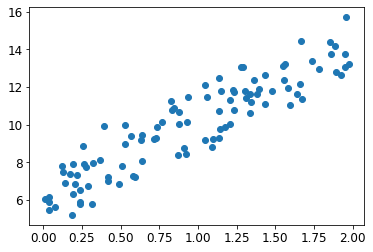

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(theta_1=4, theta_0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100, 1)
y = 4 * X + 6 + np.random.randn(100, 1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y);

데이터는 $y = 4X + 6$을 중심으로 무작위로 퍼져 있다. 다음으로 비용 함수를 정의해 보겠다. 비용 함수 <code>get_cost()</code>는 실제 y 값과 예측된 y 값을 인자로 받아서 $\frac{1}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})^2$을 계산해 반환한다.

In [35]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

이제 경사 하강법을 <code>gradient_descent()</code>라는 함수를 생성해 구현해 보겠다. <code>gradient_descent()</code>는 $\theta_1$과 $\theta_0$을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 $\theta_1$과 $\theta_0$을 업데이트한다. 즉, $\text{새로운} \theta_1 = \text{이전} \theta_1 + \eta\frac{2}{n}\sum_{i=1}^n x^{(i)}(\text{실제값}^{(i)} - \text{예측값}^{(i)}),\\ \text{새로운}\theta_0 = \text{이전}\theta_0 + \eta\frac{2}{n}\sum_{i=1}^n(\text{실제값}^{(i)} - \text{예측값}^{(i)})$을 반복적으로 적용하면서 $\theta_1$과 $\theta_0$을 업데이트하는 것이다. <code>gradient_descent()</code>는 위에서 무작위로 생성한 X와 y를 입력받는데, X와 y 모두 넘파이 ndarray이다. 넘파이 행렬에 $\theta$를 업데이트하려면 약간의 선형 대수 지식이 필요하다.

여기서 회귀계수 벡터, 가중치 벡터를 지금까진 $\theta$로 사용했으나 코드에서는 편의상 w로 대체하겠다. 즉, $\theta_1$은 $w_1$, $\theta_0$은 $w_0$과 같다고 생각하자.

<code>get_weight_update()</code> 함수에서, 입력 배열 X값에 대한 예측 배열 y_pred는 <code>np.dot(X, w1.T) + w0</code>으로 구한다. 이는 넘파이의 내적 연산을 이용한 것이다. 또한 w1_update로 $-\eta\frac{2}{n}\sum_{i=1}^nx_i\cdot(\text{예측 오류}^{(i)})$를, w0_update로 $-\eta\frac{2}{n}\sum_{i=1}^n(\text{예측 오류}^{(i)})$ 값을 넘파이의 <code>dot</code> 행렬 연산으로 계산한 뒤 이를 반환한다.

In [36]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

다음은 <code>get_weight_updates()</code>을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트하는 함수인 <code>gradient_descent_steps()</code> 함수를 생성하겠다.

In [37]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    # 인자로 주어딘 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

이제 <code>gradient_descent_steps()</code>를 호출해 w1과 w0을 구해보겠다. 그리고 최종적으로 예측값과 실제값의 MSE 차이를 계산하는 <code>get_cost()</code> 함수를 호출해 경사 하강법의 예측 오류도 계산해 보겠다.

In [38]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


실제 선형식인 $y = 4X + 6$과 유사하게 w1은 4.022, w0는 6.162가 도출되었다. 예측 오류 비용은 약 0.9935이다.

앞에서 구한 y_pred에 기반해 회귀선을 그려 보겠다.

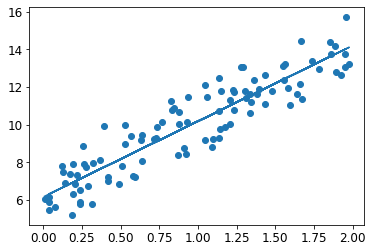

In [40]:
plt.scatter(X, y)
plt.plot(X, y_pred)

# 미주

<b id="p01">1</b> 편의상 벡터 표현으로 모델 파라미터와 특성을 모두 표현하기 위해 편향 $\theta_0$에 가상의 특성 $x_0=1$이 곱해졌다고 생각한다. [↩](#a01)

<b id="p02">2</b> 최종 모델을 평가하는 데 사용하는 성능 측정 지표 말고 학습 알고리즘이 다른 함수를 최적화하는 경우가 종종 있다. 일반적으로 성능 측정 지표에는 없는 유용한 미분 특성이 있어서 이런 함수가 계산하기 더 쉽거나, 훈련하는 동안 모델에 제약을 가하기 위해 사용한다. [↩](#a02)

<b id="p03">3</b> 사이킷런은 특성의 가중치(coef_)와 편향(intercept_)을 분리하여 저장한다. [↩](#a03)

<b id="p04">4</b> $\mathrm{X}$를 (샘플 수, 특성 수)인 $n\times m$ 행렬이라 할 때 $\mathrm{X^TX}$는 $(m\times n)\times(n \times m)=(m\times m)$ 크기의 행렬이 되므로 샘플 수($n$)가 역행렬 계산의 복잡도를 증가시키지 않고 점곱의 양만 선형적으로 증가시킨다. [↩](#a04)

<b id="p05">5</b> 두 점을 이은 선분이 두 점사이에서 항상 곡선 위에 위치할 경우를 볼록 함수, 아래에 위치할 경우 오목 함수라고 한다. [↩](#a05)

<b id="p06">6</b> 기술적으로 말하면 이 함수의 도함수가 <b>립시츠 연속</b><sup>Lipschitz continuous</sup>이다. 어떤 함수의 도함수가 일정한 범위 안에서 변할 때 이 함수를 립시츠 연속 함수라고 한다. 예를 들어 $\text{sin}(x)$는 립시츠 연속 함수지만 $\sqrt{x}$는 $x=0$일 때 기울기가 무한대가 되므로 립시츠 연속 함수가 아니다. MSE는 $x$가 무한대일 때 기울기가 무한대가 되므로 국부적인(locally) 립시츠 함수라고 한다. [↩](#a06)

<b id="p07">7</b> 특성 1이 더 작기 때문에 비용 함수에 영향을 주기 위해서는 $\theta_1$이 더 크게 바뀌어야 한다. 그래서 $\theta_1$ 축을 따라서 길쭉한 모양이 된다. 이 그래프에서 비용 함수가 지면에 수직인 축이라고 생각하면 3차원 볼록 함수의 그릇 모양을 이해하기 쉽다. [↩](#a07)